<a href="https://colab.research.google.com/github/nmshafie1993/Face_Mask_Detection/blob/master/Face_Mask_Detection_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [2]:
#cloning the data from github
!git clone "https://github.com/nmshafie1993/Face_Mask_Detection.git"

Cloning into 'Face_Mask_Detection'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 2083 (delta 2), reused 2 (delta 0), pack-reused 2051
Receiving objects: 100% (2083/2083), 1.52 GiB | 43.05 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Checking out files: 100% (1950/1950), done.


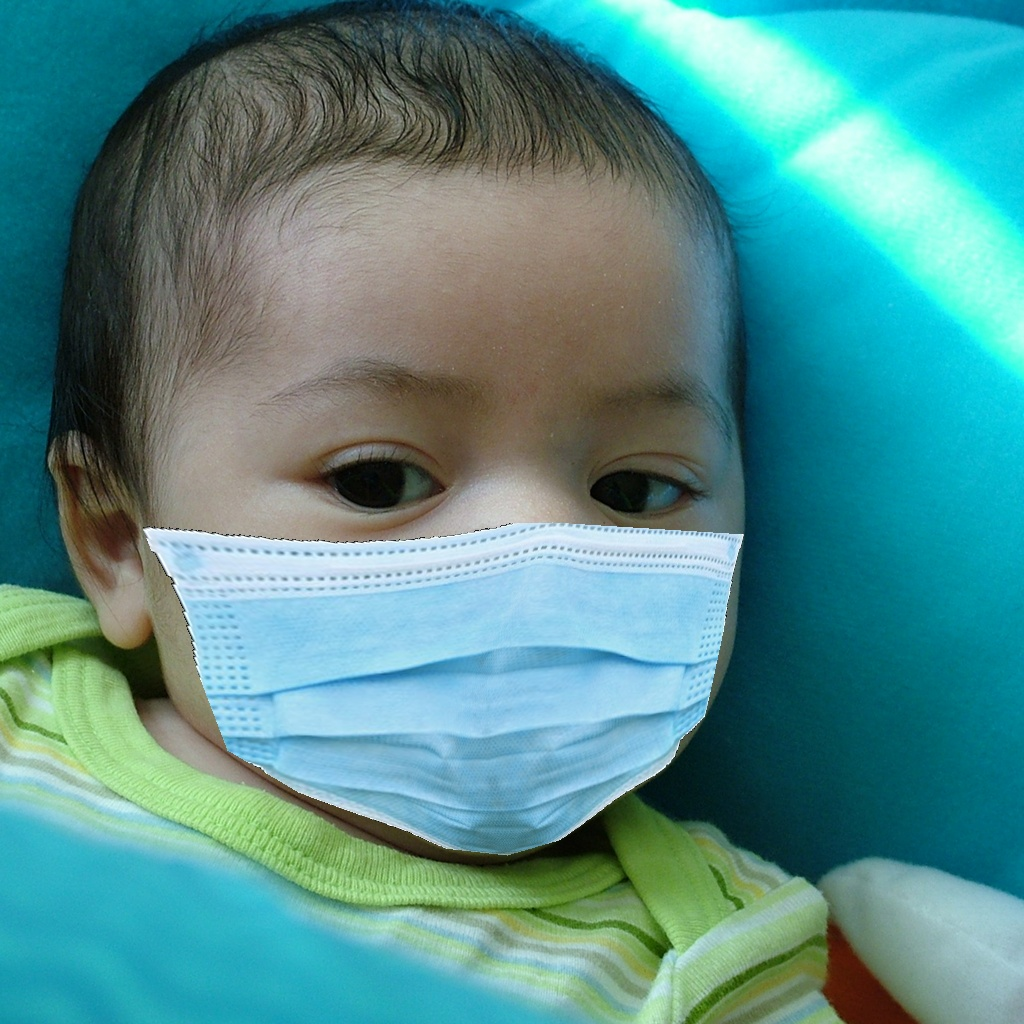

In [3]:
Image(filename='/content/Face_Mask_Detection/data/Maks/00000_Mask.jpg', width = 224, height=224)

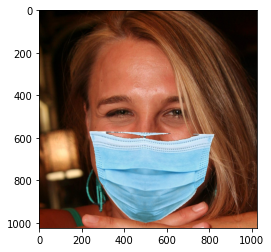

In [4]:
img_array = cv2.imread('/content/Face_Mask_Detection/data/Maks/00001_Mask.jpg')
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB));

In [5]:
img_array.shape

(1024, 1024, 3)

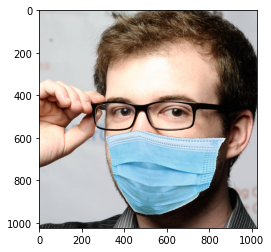

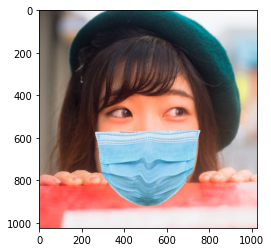

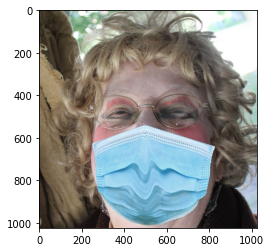

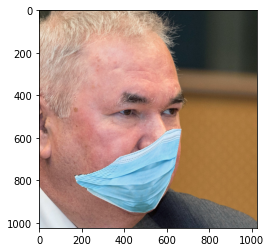

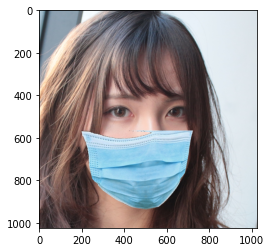

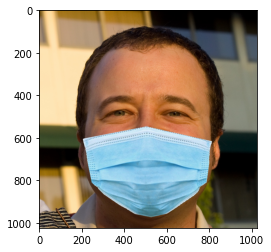

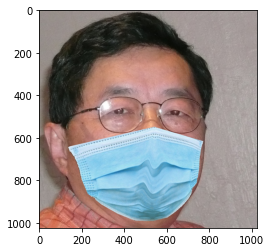

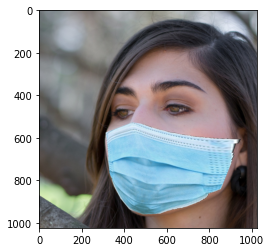

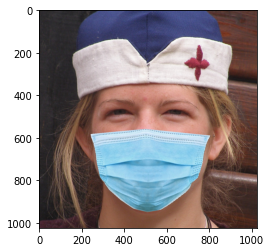

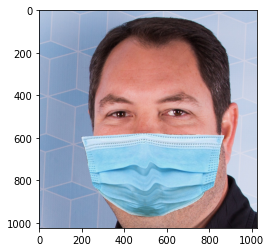

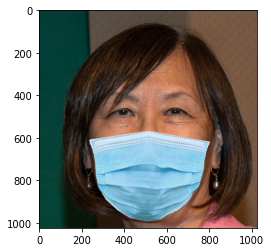

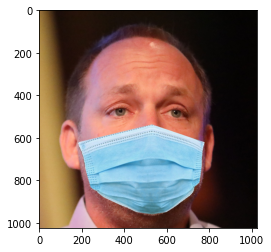

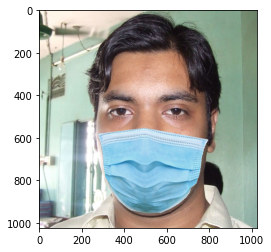

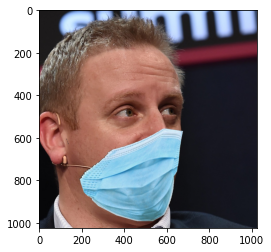

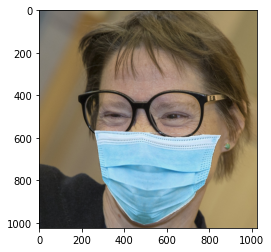

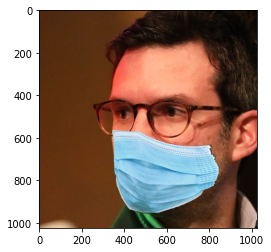

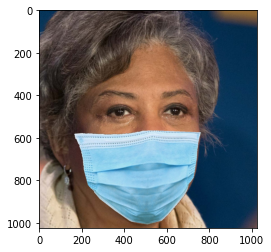

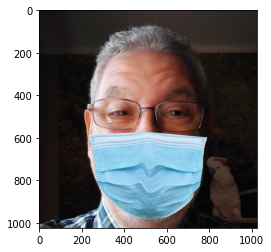

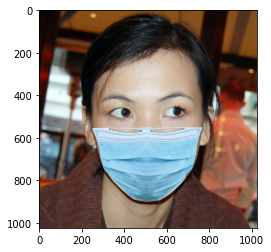

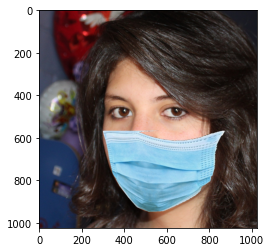

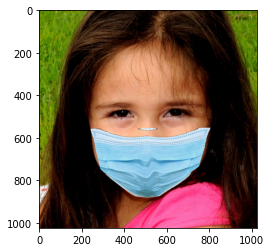

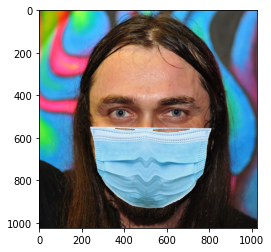

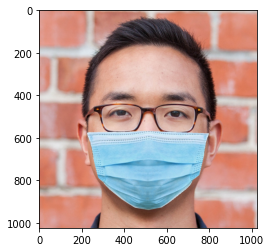

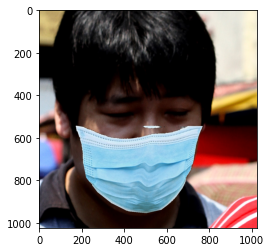

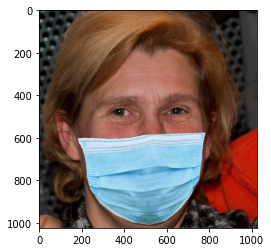

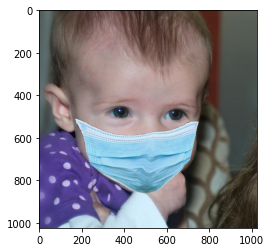

KeyboardInterrupt: ignored

In [6]:
dataDict = '/content/Face_Mask_Detection/data/'
categories = ['Maks', 'No_Masks']
for category in categories:
  path = os.path.join(dataDict, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB));
    plt.show()

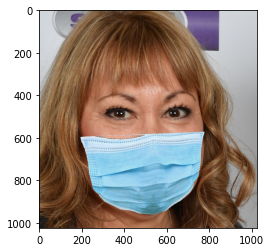

In [7]:
img_size = 224 #ImageNet 224 * 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB));

In [9]:
training = []
def create_training():
  for category in categories:
    path = os.path.join(dataDict, category)
    classNum = categories.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        training.append([new_array, classNum])
      except:
        pass


In [10]:
create_training()

In [11]:
print(len(training))

1950


In [12]:
import random
random.shuffle(training)

In [13]:
X = []
y = []

for feature, label in training:
  X.append(feature)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [15]:
X.shape

(1950, 224, 224, 3)

In [16]:
X = X/225.0